# Praktikum 1

In [37]:
!pip install -q pandas matplotlib numpy

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [39]:
df = pd.read_csv('dataset/Titanic-Dataset.csv')

In [40]:
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [41]:
df.head(100)

PassengerId  Survived  Pclass  \
0             1         0       3   
1             2         1       1   
2             3         1       3   
3             4         1       1   
4             5         0       3   
..          ...       ...     ...   
95           96         0       3   
96           97         0       1   
97           98         1       1   
98           99         1       2   
99          100         0       2   

                                                 Name     Sex   Age  SibSp  \
0                             Braund, Mr. Owen Harris    male  22.0      1   
1   Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                              Heikkinen, Miss. Laina  female  26.0      0   
3        Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                            Allen, Mr. William Henry    male  35.0      0   
..                                                ...     ...   ...    ...   
95                        Shorney, Mr. Charles Joseph    male   NaN      0   
96                          Goldschmidt, Mr. George B    male  71.0      0   
97                    Greenfield, Mr. William Bertram    male  23.0      0   
98               Doling, Mrs. John T (Ada Julia Bone)  female  34.0      0   
99                                  Kantor, Mr. Sinai    male  34.0      1   

    Parch            Ticket     Fare    Cabin Embarked  
0       0         A/5 21171   7.2500      NaN        S  
1       0          PC 17599  71.2833      C85        C  
2       0  STON/O2. 3101282   7.9250      NaN        S  
3       0            113803  53.1000     C123        S  
4       0            373450   8.0500      NaN        S  
..    ...               ...      ...      ...      ...  
95      0            374910   8.0500      NaN        S  
96      0          PC 17754  34.6542       A5        C  
97      1          PC 17759  63.3583  D10 D12        C  
98      1            231919  23.0000      NaN        S  
99      0            244367  26.0000      NaN        S  

[100 rows x 12 columns]

In [42]:
df.shape

(891, 12)

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [44]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [45]:
df.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

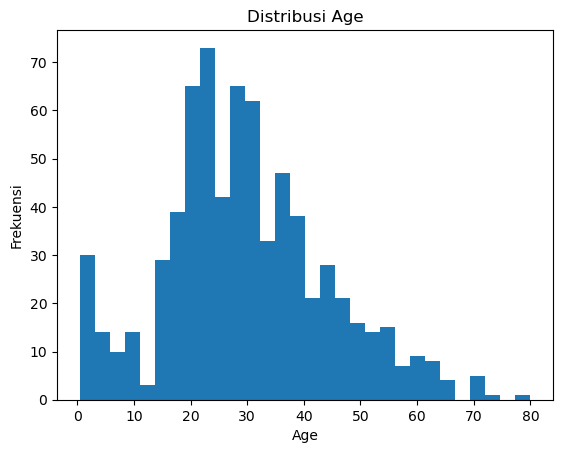

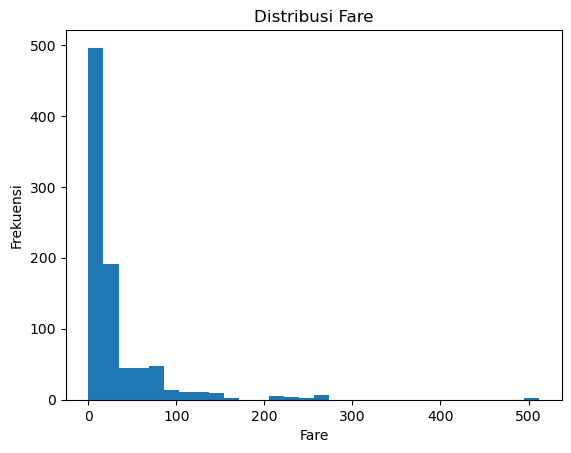

In [46]:
num_cols = ['Age','Fare']
for col in num_cols:
    plt.figure()
    plt.hist(df[col], bins=30)
    plt.title(f'Distribusi {col}')
    plt.xlabel(col); plt.ylabel('Frekuensi')
    plt.show()

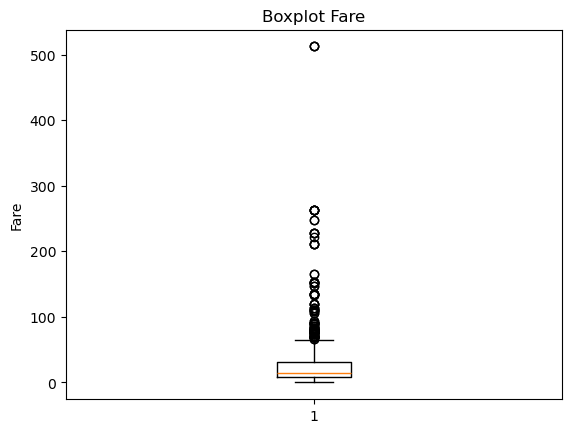

In [47]:
plt.figure()
plt.boxplot(df['Fare'].dropna(), vert=True)
plt.title('Boxplot Fare')
plt.ylabel('Fare')
plt.show()

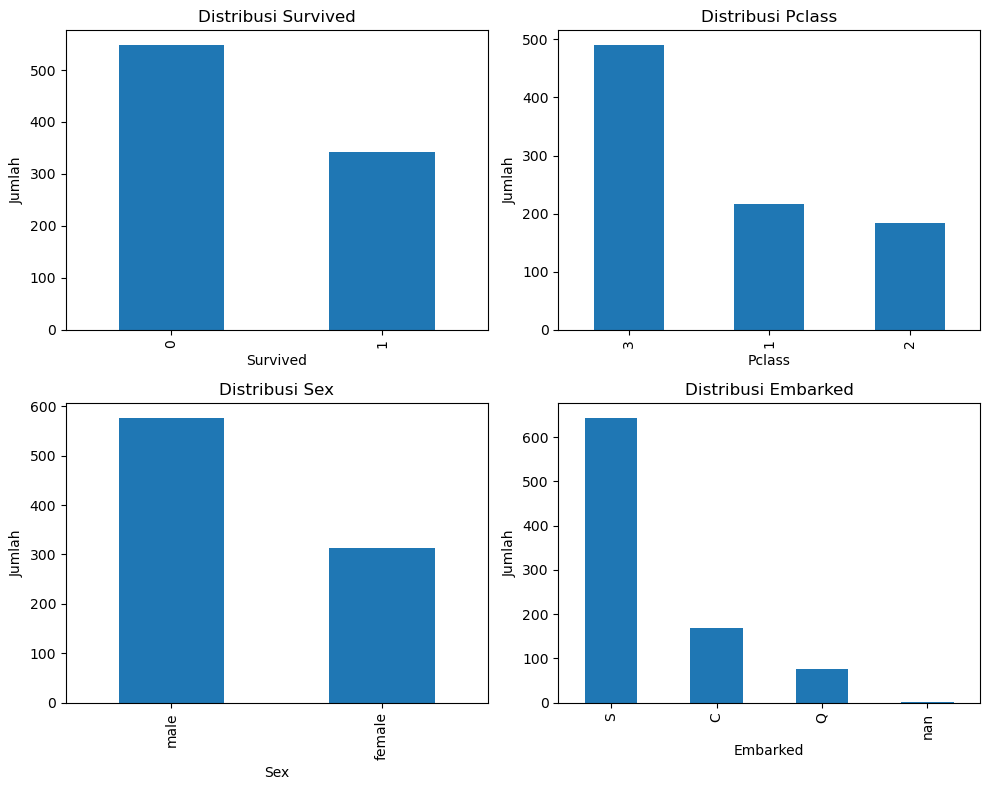

In [48]:
cat_cols = ['Survived','Pclass','Sex','Embarked']

fig, axes = plt.subplots(2, 2, figsize=(10, 8))
axes = axes.flatten()

for i, col in enumerate(cat_cols):
    df[col].value_counts(dropna=False).plot(kind='bar', ax=axes[i])
    axes[i].set_title(f'Distribusi {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Jumlah')

plt.tight_layout()
plt.show()

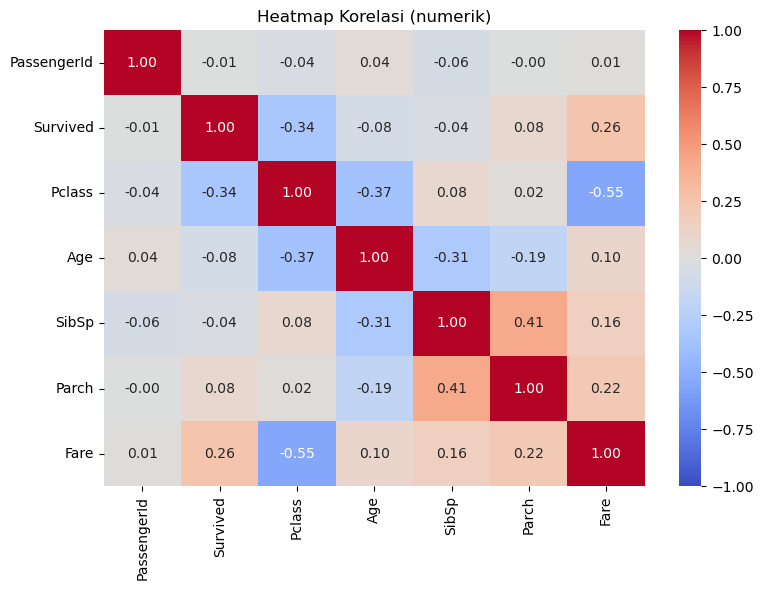

In [49]:
import seaborn as sns # Import seaborn for enhanced visualization

num_only = df.select_dtypes(include=[np.number])
corr = num_only.corr(numeric_only=True)

plt.figure(figsize=(8, 6)) # Increased figure size for better readability
sns.heatmap(corr, cmap='coolwarm', vmin=-1, vmax=1, annot=True, fmt=".2f") # Use seaborn.heatmap with annotation
plt.title('Heatmap Korelasi (numerik)')
plt.tight_layout()
plt.show()

In [50]:
corr['Survived'].sort_values(ascending=False)

Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
Name: Survived, dtype: float64

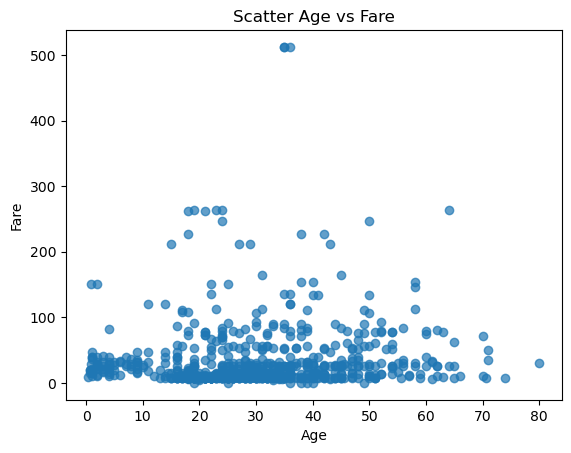

In [51]:
plt.figure()
surv_map = {0:'No', 1:'Yes'}
plt.scatter(df['Age'], df['Fare'], alpha=0.7)
plt.xlabel('Age'); plt.ylabel('Fare')
plt.title('Scatter Age vs Fare')
plt.show()

# Praktikum 2

In [52]:
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [53]:
df['Age'] = df['Age'].fillna(df['Age'].mean())
df['Cabin'] = df['Cabin'].fillna("DECK")
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Praktikum 3

In [55]:
df = df[['Survived', 'Pclass', 'Age', 'Sex', 'Cabin']]
df.head()

Survived  Pclass   Age     Sex Cabin
0         0       3  22.0    male  DECK
1         1       1  38.0  female   C85
2         1       3  26.0  female  DECK
3         1       1  35.0  female  C123
4         0       3  35.0    male  DECK

In [56]:
from sklearn.calibration import LabelEncoder


le = LabelEncoder() # membuat objek dari LabelEncoder
df['Sex'] = le.fit_transform(df['Sex']) # proses encoding
df['Cabin'] = le.fit_transform(df['Cabin']) # proses encoding

In [57]:
df.head()

Survived  Pclass   Age  Sex  Cabin
0         0       3  22.0    1    115
1         1       1  38.0    0     81
2         1       3  26.0    0    115
3         1       1  35.0    0     55
4         0       3  35.0    1    115

In [58]:
from sklearn.discriminant_analysis import StandardScaler


std = StandardScaler()
df['Age'] = std.fit_transform(df[['Age']])

In [59]:
df.head()

Survived  Pclass       Age  Sex  Cabin
0         0       3 -0.592481    1    115
1         1       1  0.638789    0     81
2         1       3 -0.284663    0    115
3         1       1  0.407926    0     55
4         0       3  0.407926    1    115

# Praktikum 4

In [60]:
!pip install -q opencv-python matplotlib

In [61]:
import cv2
import matplotlib.pyplot as plt

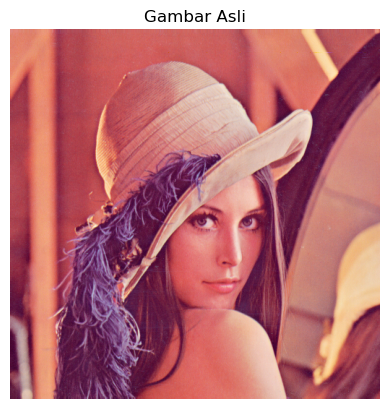

In [75]:
# Membaca gambar (BGR default di OpenCV)
img = cv2.imread("dataset/Lenna.png")

# Konversi BGR → RGB (agar warnanya tampil benar di matplotlib)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Tampilkan
plt.imshow(img_rgb)
plt.title("Gambar Asli")
plt.axis("off")
plt.show()

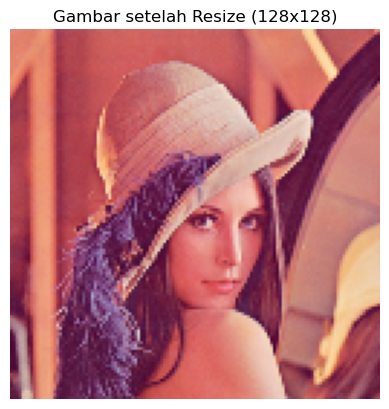

In [63]:
# Resize gambar
img_resized = cv2.resize(img_rgb, (128, 128))

plt.imshow(img_resized)
plt.title("Gambar setelah Resize (128x128)")
plt.axis("off")
plt.show()

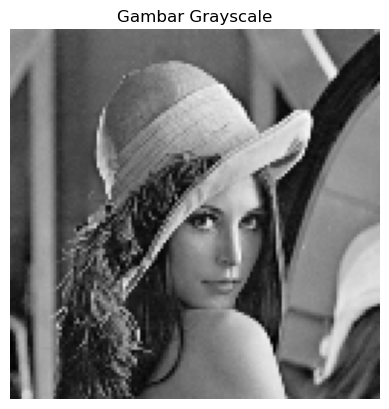

In [64]:
# Konversi ke grayscale
img_gray = cv2.cvtColor(img_resized, cv2.COLOR_BGR2GRAY)

plt.imshow(img_gray, cmap="gray")
plt.title("Gambar Grayscale")
plt.axis("off")
plt.show()

# Tugas Praktikum

In [65]:
import pandas as pd

data = pd.read_csv('dataset/wbc.csv')
data.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0  ...          17.33           184.60      2019.0            0.1622   
1  ...          23.41           158.80      1956.0            0.1238   
2  ...          25.53           152.50      1709.0            0.1444   
3  ...          26.50            98.87       567.7            0.2098   
4  ...          16.67           152.20      1575.0            0.1374   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN  
1                  0.08902          NaN  
2                  0.08758          NaN  
3                  0.17300          NaN  
4                  0.07678          NaN  

[5 rows x 33 columns]

In [66]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

## Memisahkan variabel yang dapat digunakan dan tidak dapat digunakan

In [67]:
data = data.drop(columns=['id', 'Unnamed: 32'])

Variabel yang tidak dapat digunakan adalah variabel id dan Unnamed: 32, sementara variabel lain dapat digunakan untuk mengidentifikasi jenis kanker. Maka dari itu pemisahannya dengan cara membuang kolom id dan Unnamed: 32

In [68]:
data.head()

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0         M        17.99         10.38          122.80     1001.0   
1         M        20.57         17.77          132.90     1326.0   
2         M        19.69         21.25          130.00     1203.0   
3         M        11.42         20.38           77.58      386.1   
4         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0         0.2419  ...         25.38          17.33           184.60   
1         0.1812  ...         24.99          23.41           158.80   
2         0.2069  ...         23.57          25.53           152.50   
3         0.2597  ...         14.91          26.50            98.87   
4         0.1809  ...         22.54          16.67           152.20   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   concave points_worst  symmetry_worst  fractal_dimension_worst  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  

[5 rows x 31 columns]

## Proses encoding kolom "diagnosis" menggunakan encoder dari sklearn

In [69]:
data['diagnosis'] = le.fit_transform(data['diagnosis'])
data.head()

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0          1        17.99         10.38          122.80     1001.0   
1          1        20.57         17.77          132.90     1326.0   
2          1        19.69         21.25          130.00     1203.0   
3          1        11.42         20.38           77.58      386.1   
4          1        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0         0.2419  ...         25.38          17.33           184.60   
1         0.1812  ...         24.99          23.41           158.80   
2         0.2069  ...         23.57          25.53           152.50   
3         0.2597  ...         14.91          26.50            98.87   
4         0.1809  ...         22.54          16.67           152.20   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   concave points_worst  symmetry_worst  fractal_dimension_worst  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  

[5 rows x 31 columns]

## Proses standarisaasi pada semua kolom numerik

In [70]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [71]:
num_cols = data.select_dtypes(include=[float, int]).columns.drop('diagnosis')
data[num_cols] = std.fit_transform(data[num_cols])
data.head()

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0          1     1.097064     -2.073335        1.269934   0.984375   
1          1     1.829821     -0.353632        1.685955   1.908708   
2          1     1.579888      0.456187        1.566503   1.558884   
3          1    -0.768909      0.253732       -0.592687  -0.764464   
4          1     1.750297     -1.151816        1.776573   1.826229   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0         1.568466          3.283515        2.652874             2.532475   
1        -0.826962         -0.487072       -0.023846             0.548144   
2         0.942210          1.052926        1.363478             2.037231   
3         3.283553          3.402909        1.915897             1.451707   
4         0.280372          0.539340        1.371011             1.428493   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0       2.217515  ...      1.886690      -1.359293         2.303601   
1       0.001392  ...      1.805927      -0.369203         1.535126   
2       0.939685  ...      1.511870      -0.023974         1.347475   
3       2.867383  ...     -0.281464       0.133984        -0.249939   
4      -0.009560  ...      1.298575      -1.466770         1.338539   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0    2.001237          1.307686           2.616665         2.109526   
1    1.890489         -0.375612          -0.430444        -0.146749   
2    1.456285          0.527407           1.082932         0.854974   
3   -0.550021          3.394275           3.893397         1.989588   
4    1.220724          0.220556          -0.313395         0.613179   

   concave points_worst  symmetry_worst  fractal_dimension_worst  
0              2.296076        2.750622                 1.937015  
1              1.087084       -0.243890                 0.281190  
2              1.955000        1.152255                 0.201391  
3              2.175786        6.046041                 4.935010  
4              0.729259       -0.868353                -0.397100  

[5 rows x 31 columns]